In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def blind_iq_compensation(z):
    """
    Function to estimate and compensate IQ impairments for the
    single-branch IQ impairment model
    Parameters:
    z: DC impaired signal sequence (numpy format)
    Returns:
    y: IQ imbalance compensated signal sequence
    """
    I=np.real(z);Q=np.imag(z)
    print(I, Q)
    theta1=(-1)*np.mean(np.sign(I)*Q)
    print(theta1)
    theta2=np.mean(abs(I)); theta3=np.mean(abs(Q))
    print(theta2)
    c1=theta1/theta2
    print(c1)
    c2=np.sqrt((theta3**2-theta1**2)/theta2**2)
    print(c2)
    return I +1j*(c1*I+Q)/c2

In [7]:
blind_iq_compensation(0.08)

2 0
-0.0
2.0
-0.0
0.0


ZeroDivisionError: complex division by zero

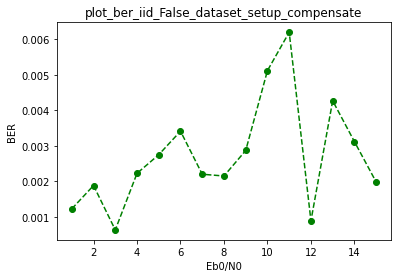

<Figure size 432x288 with 0 Axes>

In [4]:
iid = False
dataset_setup = 'compensate'
ber = [0.0012249998748302463, 0.0018812499940395353, 0.0006312504410743714, 0.0022249996662139894, 0.0027499996125698086, 0.003412500023841858, 0.0021999999880790715, 0.002150000631809235, 0.002868751436471939, 0.005118749290704727, 0.006200000643730163, 0.0008875004947185515, 0.004268749058246613, 0.0031187519431114205, 0.0019812501966953275]

# with open(f'plot_ber_iid_{iid}_dataset_setup_{dataset_setup}.txt', 'w+') as f:
#     f.write(str(ber))
plt.plot(range(1, 16), ber, color = 'green', marker='o', linestyle='dashed')
plt.xlabel('Eb0/N0')
plt.ylabel('BER')
plt.title(f'plot_ber_iid_{iid}_dataset_setup_{dataset_setup}')
plt.show()
plt.savefig(f'plot_ber_iid_{iid}_dataset_setup_{dataset_setup}.png')

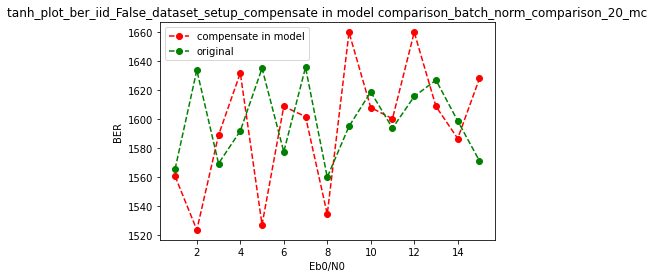

In [17]:
iid = False
dataset_setup = 'compensate in model comparison'
ber_model_comp = [0.01560625061392784, 0.015236251056194304, 0.01588999927043915, 0.01631749868392944, 0.015272500365972521, 0.016087498515844345, 0.01601749956607819, 0.015345001220703125, 0.016597502678632737, 0.0160800002515316, 0.01600250005722046, 0.01659875214099884, 0.016087500751018523, 0.015866249799728394, 0.016279999911785126]
ber_original =[0.01565624848008156, 0.01633749827742577, 0.01569375097751617, 0.015918750315904617, 0.016350000351667403, 0.01577499955892563, 0.016356249898672105, 0.015600001066923138, 0.015949998050928116, 0.016187500208616253, 0.01593750044703484, 0.016156251728534698, 0.01626875177025795, 0.015987499058246608, 0.015712501108646394]
# for i in range(1, 16):
#     ber_new = 2
#     ber.append(ber_new)
#     with open(f'tanh_plot_ber_iid_{iid}_dataset_setup_{dataset_setup}.txt', 'a+') as f:
#         f.write(str(i) + ':' + str(ber_new) + '\n')

# with open(f'tanh_plot_ber_iid_{iid}_dataset_setup_{dataset_setup}.txt', 'a+') as f:
#         f.write(str(ber) + '\n')
        
plt.figure()
plt.plot(range(1, 16), np.array(ber_model_comp), color = 'red', marker='o', linestyle='dashed', label = 'compensate in model')
plt.plot(range(1, 16), np.array(ber_original), color = 'green', marker='o', linestyle='dashed', label ='original')
plt.legend()
plt.xlabel('Eb0/N0')
plt.ylabel('BER')
plt.title(f'tanh_plot_ber_iid_{iid}_dataset_setup_{dataset_setup}_batch_norm_comparison_20_mc')
plt.savefig(f'tanh_plot_ber_iid_{iid}_dataset_setup_{dataset_setup}_batch_norm_comparison_20_mc.png')
plt.show()